In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
excel_path = 'Swiggy_Data.xlsx'
file = pd.ExcelFile(excel_path)
raw_df = file.parse('Raw Data')
country_df = file.parse('country description')
                    

In [21]:
# Merge to add country names

country_df.columns = ['CountryCode' , 'Country']
df = raw_df.merge(country_df, on='CountryCode' , how='left')


In [41]:
# Basic cleaning: ensure numeric columns
numeric_cols = ['Price_range', 'Votes', 'Average_Cost_for_two', 'Rating']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    

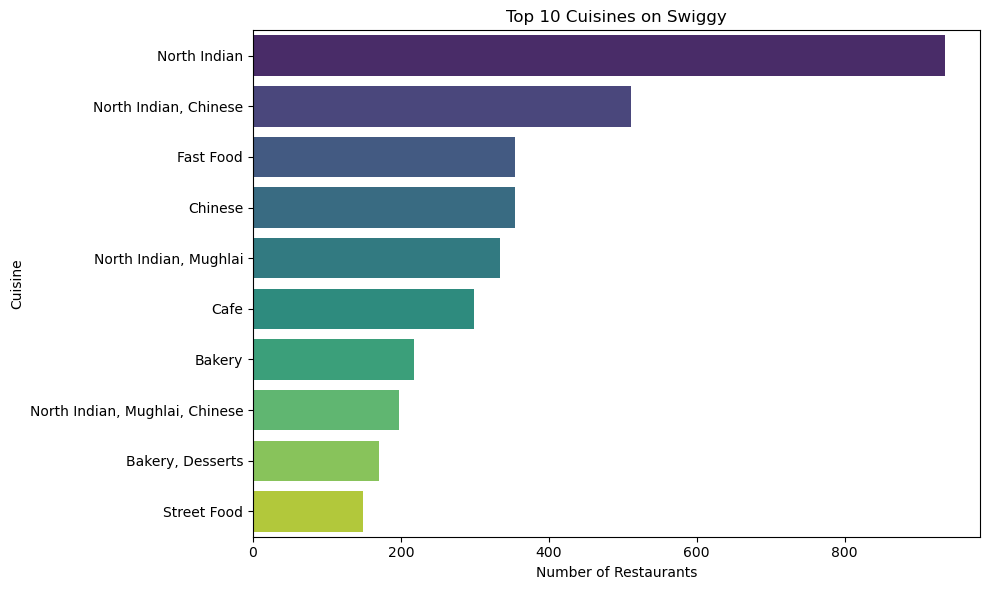

In [93]:
# 1. Top 10 cuisines

#Get top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().nlargest(10).reset_index()
top_cuisines.columns = ['Cuisine', 'Count']

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x='Count',
    y='Cuisine',
    data=top_cuisines,
    hue='Cuisine',            # Hue is now a column
    palette='viridis',
    legend=False              # Hide legend
)

# Labels and layout
plt.title('Top 10 Cuisines on Swiggy')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.savefig('top_cuisines.png')
plt.show()


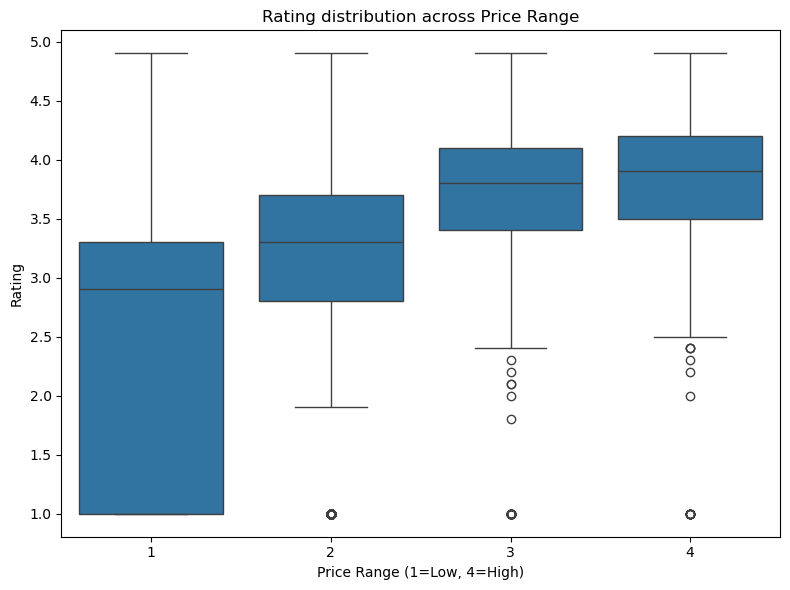

In [87]:
# 2. Rating vs Price_range boxplot
plt.figure(figsize=(8,6))   # Set the size of the plot

ax2 = sns.boxplot(
    x='Price_range',        # Categories: 1 (Low) to 4 (High)
    y='Rating',             # Numerical values to show distribution
    data=df                 # Your dataset
)

plt.title('Rating distribution across Price Range')      # Plot title
plt.xlabel('Price Range (1=Low, 4=High)')                # X-axis label
plt.ylabel('Rating')                                     # Y-axis label
plt.tight_layout()                                       # Prevent layout clipping
plt.savefig('rating_price.png')                          # Save the plot as PNG
plt.show()                                               # Display the plot


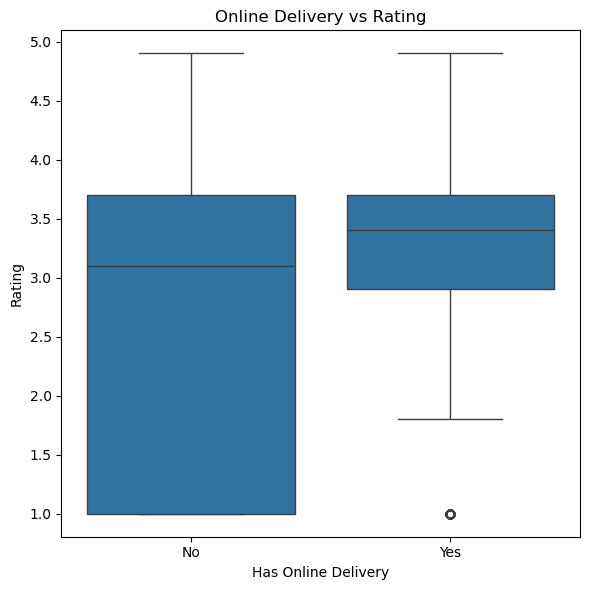

In [85]:
# 3. Online delivery impact on rating
plt.figure(figsize=(6,6))  # Set figure size

ax = sns.boxplot(         # Boxplot shows rating distribution
    x='Has_Online_delivery', 
    y='Rating', 
    data=df
)

plt.title('Online Delivery vs Rating')         # Plot title
plt.xlabel('Has Online Delivery')              # X-axis label
plt.ylabel('Rating')                           # Y-axis label
plt.tight_layout()                             # Prevent layout cutoff
plt.savefig('online_delivery_rating.png')      # Save as image
plt.show()                                     # Display plot


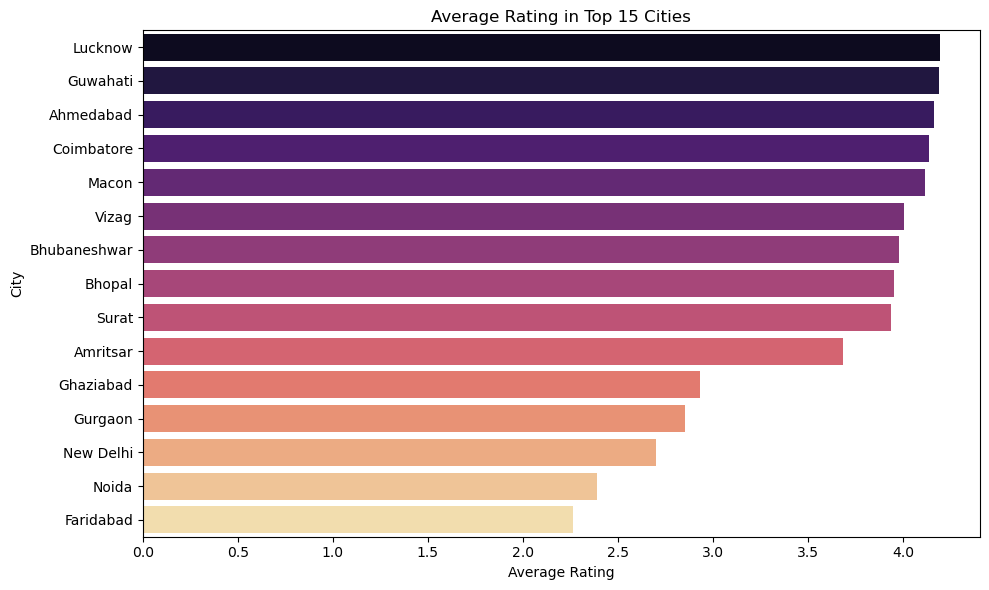

In [91]:
# 4. Average rating by city (top 15 cities by restaurant count)

# Get top 15 cities by count
top_cities = df['City'].value_counts().nlargest(15).index

#  Filter and group
city_group = df[df['City'].isin(top_cities)].groupby('City')['Rating'].mean().sort_values(ascending=False)

# Convert to DataFrame
city_df = city_group.reset_index()
city_df.columns = ['City', 'Average_Rating']

#  Plot using hue properly
plt.figure(figsize=(10,6))
ax4 = sns.barplot(
    x='Average_Rating',
    y='City',
    data=city_df,
    hue='City',         # This is okay now because City is a column
    palette='magma',
    legend=False        # Hide legend
)

#  Add labels
plt.title('Average Rating in Top 15 Cities')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('city_avg_rating.png')
plt.show()


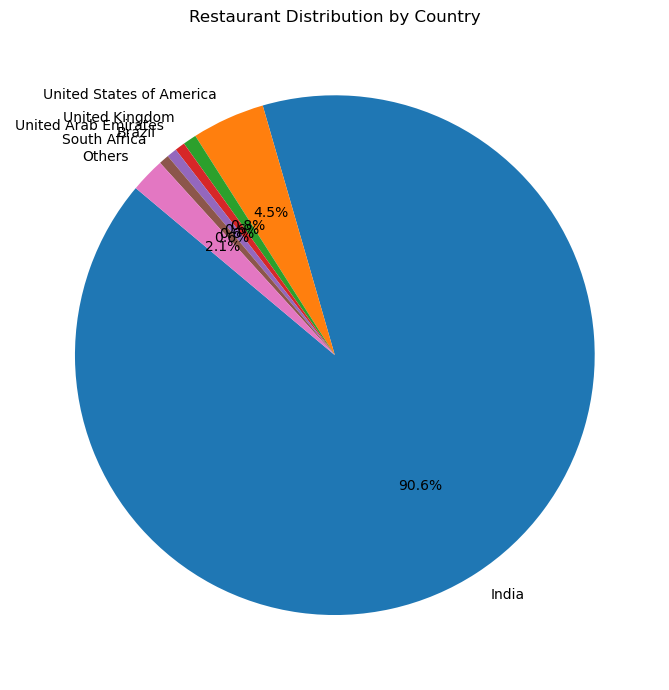

In [95]:
# 5. Restaurants by country pie chart (top 6 countries, others grouped)

country_counts = df['Country'].value_counts()              # Get restaurant count per country
others = country_counts.iloc[6:].sum()                     # Sum all except top 6
plot_counts = country_counts.iloc[:6].copy()               # Top 6
plot_counts['Others'] = others                             # Add 'Others' slice

plt.figure(figsize=(7,7))
plt.pie(
    plot_counts.values, 
    labels=plot_counts.index, 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Restaurant Distribution by Country')
plt.tight_layout()
plt.savefig('country_distribution.png')
plt.show()


In [97]:
print('Generated visualizations and saved as PNG files.')

Generated visualizations and saved as PNG files.


In [109]:
from IPython.display import IFrame

# Visualize this data in a 3D plot showing : cost vs vote vs rating

# Display the 3D HTML file in the notebook
IFrame(src='swiggy_3d_d71ede14.html', width='100%', height='600')

#wait few Secs for Output
